In [1]:
# make sure you have installed correctly using this check:
import Bio
print(Bio.__version__)

1.72


The Bio.Seq module allows us to make use of the Bio.Seq.Seq class type.  While this just look like strings on the surface, python will actually treat them differently.

In [2]:
# Create a sequence as a string
from Bio.Seq import Seq
my_seq = Seq("AGTACACTGGT")
print(my_seq)
print("my_seq:", type(my_seq))
str_seq = "AGTACACTGGT"
print("str_seq:",type(str_seq))


AGTACACTGGT
my_seq: <class 'Bio.Seq.Seq'>
str_seq: <class 'str'>


More than likely we'll be reading in a file rather than typing it in manually.  In a similar way to how we use .read() to parse through a text document, we can use the SeqIO.parse function to help parse through fasta files.

In [4]:
from Bio import SeqIO
example_dna = SeqIO.parse("ls_orchid.fasta.rtf", "fasta")
for seq_record in example_dna:
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))

gi|2765657|emb|Z78532.1|CCZ78532
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAG...C\\', SingleLetterAlphabet())
765
gi|2765656|emb|Z78531.1|CFZ78531
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...A\\', SingleLetterAlphabet())
760
gi|2765655|emb|Z78530.1|CMZ78530
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAAACAACAT...T\\', SingleLetterAlphabet())
756
gi|2765654|emb|Z78529.1|CLZ78529
Seq('ACGGCGAGCTGCCGAAGGACATTGTTGAGACAGCAGAATATACGATTGAGTGAA...A\\', SingleLetterAlphabet())
745
gi|2765652|emb|Z78527.1|CYZ78527
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...C\\', SingleLetterAlphabet())
730
gi|2765651|emb|Z78526.1|CGZ78526
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...T\\', SingleLetterAlphabet())
742
gi|2765650|emb|Z78525.1|CAZ78525
Seq('TGTTGAGATAGCAGAATATACATCGAGTGAATCCGGAGGACCTGTGGTTATTCG...A\\', SingleLetterAlphabet())
716
gi|2765649|emb|Z78524.1|CFZ78524
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGATAGTAG...C\

In [8]:
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC

# the alphabet can be specified in the second argument,
# for example, DNA has the alphabet ACGT
print(IUPAC.unambiguous_dna.letters)

coding_dna = Seq("TGCATTGGGTGCTGA",IUPAC.unambiguous_dna)
template_dna = coding_dna.reverse_complement()
messenger_rna = coding_dna.transcribe()

print("Coding:       ",coding_dna)
print("Template:     ",template_dna)
print("Messenger RNA:",messenger_rna)
print("Translation:  ",messenger_rna.translate())


GATC
Coding:        TGCATTGGGTGCTGA
Template:      TCAGCACCCAATGCA
Messenger RNA: UGCAUUGGGUGCUGA
Translation:   CIGC*


In [10]:
print("\n".join(dir(IUPAC)))

Alphabet
ExtendedIUPACDNA
ExtendedIUPACProtein
IUPACAmbiguousDNA
IUPACAmbiguousRNA
IUPACData
IUPACProtein
IUPACUnambiguousDNA
IUPACUnambiguousRNA
__builtins__
__cached__
__doc__
__file__
__loader__
__name__
__package__
__spec__
ambiguous_dna
ambiguous_rna
extended_dna
extended_protein
protein
unambiguous_dna
unambiguous_rna


In [12]:
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML

sequence = "ACTATTCCAAACAGCTCATAACCAGAAA"
# this will take a ~half a minute to complete
handle = NCBIWWW.qblast("blastn", "nt", sequence)
# type(handle) <class '_io.StringIO'>
result = handle.read()
print(result)		# Output is in XML format


<?xml version="1.0"?>
<!DOCTYPE BlastOutput PUBLIC "-//NCBI//NCBI BlastOutput/EN" "http://www.ncbi.nlm.nih.gov/dtd/NCBI_BlastOutput.dtd">
<BlastOutput>
  <BlastOutput_program>blastn</BlastOutput_program>
  <BlastOutput_version>BLASTN 2.8.1+</BlastOutput_version>
  <BlastOutput_reference>Stephen F. Altschul, Thomas L. Madden, Alejandro A. Sch&amp;auml;ffer, Jinghui Zhang, Zheng Zhang, Webb Miller, and David J. Lipman (1997), &quot;Gapped BLAST and PSI-BLAST: a new generation of protein database search programs&quot;, Nucleic Acids Res. 25:3389-3402.</BlastOutput_reference>
  <BlastOutput_db>nt</BlastOutput_db>
  <BlastOutput_query-ID>Query_174625</BlastOutput_query-ID>
  <BlastOutput_query-def>No definition line</BlastOutput_query-def>
  <BlastOutput_query-len>28</BlastOutput_query-len>
  <BlastOutput_param>
    <Parameters>
      <Parameters_expect>10</Parameters_expect>
      <Parameters_sc-match>2</Parameters_sc-match>
      <Parameters_sc-mismatch>-3</Parameters_sc-mismatch>
      <

In [9]:
# can think of these as google results
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
sequence = "ACTATTCCAAACAGCTCATAACCAGAAA"
handle = NCBIWWW.qblast("blastn", "nt", sequence)
records = NCBIXML.parse(handle)
record = next(records)
for alignment in record.alignments:
    for hsp in alignment.hsps:
        print('sequence:', alignment.title)
        print('length:', alignment.length)
        print('e value:', hsp.expect)
        print(hsp.query[0:75] + '...')
        print(hsp.match[0:75] + '...')
        print(hsp.sbjct[0:75] + '...')


sequence: gi|1243416810|gb|CP023335.1| Drosophila melanogaster strain rover (forR) chromosome X
length: 22422823
e value: 0.000154328
ACTATTCCAAACAGCTCATAACCAGAAA...
||||||||||||||||||||||||||||...
ACTATTCCAAACAGCTCATAACCAGAAA...
sequence: gi|1243416743|gb|CP023329.1| Drosophila melanogaster strain sitter (fors) chromosome X
length: 22422435
e value: 0.000154328
ACTATTCCAAACAGCTCATAACCAGAAA...
||||||||||||||||||||||||||||...
ACTATTCCAAACAGCTCATAACCAGAAA...
sequence: gi|667695275|gb|AE014298.5| Drosophila melanogaster chromosome X
length: 23542271
e value: 0.000154328
ACTATTCCAAACAGCTCATAACCAGAAA...
||||||||||||||||||||||||||||...
ACTATTCCAAACAGCTCATAACCAGAAA...
sequence: gi|21538995|gb|AC105774.8| Drosophila melanogaster X BAC RP98-8O5 (Roswell Park Cancer Institute Drosophila BAC Library) complete sequence
length: 170186
e value: 0.000154328
ACTATTCCAAACAGCTCATAACCAGAAA...
||||||||||||||||||||||||||||...
ACTATTCCAAACAGCTCATAACCAGAAA...
sequence: gi|3392907|emb|AL009147.1| Drosophila m

In [18]:
# TRY IT: biopython

from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
sequence = "ACTATTCCAAACAGCTCATAACCAGAAA"
handle = NCBIWWW.qblast("blastn", "nt", sequence)
records = NCBIXML.parse(handle)
record = next(records)
count = 0
for alignment in record.alignments:
    for hsp in alignment.hsps:
        count += 1
        if count > 3:
            break
        print('\nsequence:', alignment.title)
        print('length:', alignment.length)
        print(hsp.query[0:75] + '...')
        print(hsp.match[0:75] + '...')
        print(hsp.sbjct[0:75] + '...')



sequence: gi|1243416810|gb|CP023335.1| Drosophila melanogaster strain rover (forR) chromosome X
length: 22422823
ACTATTCCAAACAGCTCATAACCAGAAA...
||||||||||||||||||||||||||||...
ACTATTCCAAACAGCTCATAACCAGAAA...

sequence: gi|1243416743|gb|CP023329.1| Drosophila melanogaster strain sitter (fors) chromosome X
length: 22422435
ACTATTCCAAACAGCTCATAACCAGAAA...
||||||||||||||||||||||||||||...
ACTATTCCAAACAGCTCATAACCAGAAA...

sequence: gi|667695275|gb|AE014298.5| Drosophila melanogaster chromosome X
length: 23542271
ACTATTCCAAACAGCTCATAACCAGAAA...
||||||||||||||||||||||||||||...
ACTATTCCAAACAGCTCATAACCAGAAA...


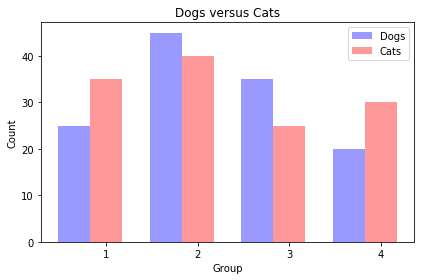

In [24]:
# for plotting in jupyter
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np

# Data sset
data1 = [25,45,35,20]
data2 = [35,40,25,30]
index = np.arange(len(data1))
bar_width = 0.35
opacity = 0.4

# Creates two bars
rects1 = plt.bar(index, data1, bar_width, alpha=opacity,
                 color='b',label='Dogs')
rects2 = plt.bar(index + bar_width, data2, bar_width,
                 alpha=opacity, color='r', label='Cats')

plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Dogs versus Cats')
plt.xticks(index + bar_width, ('1', '2', '3', '4'))
plt.legend()
plt.tight_layout()
plt.show()


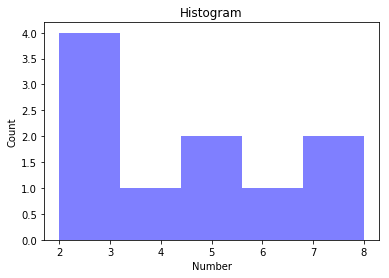

In [25]:
import matplotlib.pyplot as plt

num_bins = 5
x = [5, 3, 8, 5, 2, 7, 2, 4, 6, 2]
n, bins, patches = plt.hist(x, num_bins,
                            density=False, facecolor='blue',
                            alpha=0.5)

plt.xlabel('Number')
plt.ylabel('Count')
plt.title('Histogram')
plt.show()


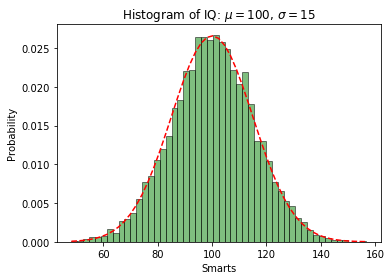

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

mu = 100
sigma = 15
x = mu+sigma*np.random.randn(10000)
num_bins = 50
n, bins, patches = plt.hist(x, num_bins, edgecolor="k",
                            density=1, facecolor='green',
                            alpha=0.5)
y = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')# red dashed line
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')
plt.subplots_adjust(left=0.15)
plt.show()



[0 1 2 3 4]


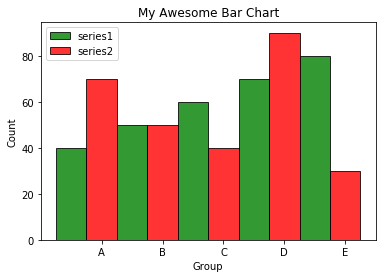

In [5]:
######################
# TRY it: Charts
######################


%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

series1 = [40, 50, 60, 70, 80]
series2 = [70, 50, 40, 90, 30]
index = np.arange(len(series1))
print(index)

bar_width = 0.5
opacity = 0.8
rects1 = plt.bar(index, series1, bar_width, alpha=opacity,
                 color='g', edgecolor="k",label='series1')
rects2 = plt.bar(index + bar_width, series2, bar_width,alpha=opacity,
                 color='r', edgecolor="k", label='series2')

plt.xlabel('Group')
plt.ylabel('Count')
plt.title('My Awesome Bar Chart')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D', 'E'))
plt.legend()
plt.show()


Predicted y-values: [10.85714286 15.11428571 19.37142857 23.62857143 27.88571429 32.14285714]
Prediction error: [ 0.14285714 -1.11428571  0.62857143  0.37142857  1.11428571 -1.14285714]
Residual error: 1.041976144503454


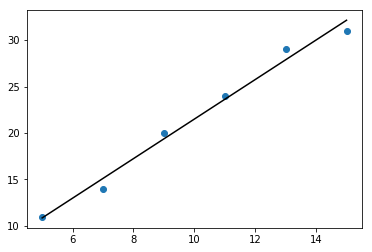

In [2]:
%matplotlib inline
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
x = np.array([5, 7, 9, 11, 13, 15])
y = np.array([11, 14, 20, 24, 29, 31])
slope, intercept, r_value, p_value,slope_std_error = stats.linregress(x, y)
predict_y = intercept + slope * x
print("Predicted y-values:",predict_y)
pred_error = y - predict_y
print("Prediction error:",pred_error)
degr_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degr_freedom)
print("Residual error:",residual_std_error)
plt.plot(x, y, 'o') # o for circular points
plt.plot(x, predict_y, 'k-') # k for black (b for blue)
plt.show()

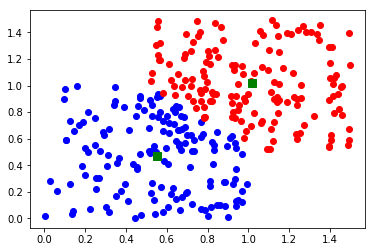

In [7]:

import numpy as np
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq

# data generation
data = vstack((rand(150,2) + array([.5,.5]),rand(150,2)))

# computing K-Means with K = 2 (2 clusters)
numclusters = 2
centroids,_ = kmeans(data,numclusters)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# Move data into individual lists based on clustering
clusters = []
for i in range(0, numclusters):
    clusters.append([[],[]])

for i in range(0,len(idx)):
    clusterIdx = idx[i]
    clusters[clusterIdx][0].append(data[i][0])
    clusters[clusterIdx][1].append(data[i][1])

# Plot data points and cluster centroids
plt.plot(clusters[0][0],clusters[0][1],'ob',
         clusters[1][0],clusters[1][1],'or')
# s for square g for green
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
plt.show()


Formula: -3.0500000000000003 * x + 3.299999999999997 = y
Predicted y-values: [  0.25 -11.95 -27.2  -42.45 -57.7  -72.95]
Prediction error: [-1.25 -0.05  1.2   2.45 -2.3  -0.05]
Residual error: 1.8907670401189043


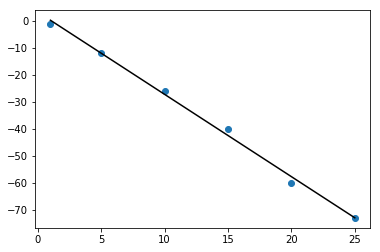

In [32]:
#############################
# Try it: Linear Regression #
#############################

# true model
# x = [1, 5, 10, 15, 20, 25]
# y = [x * -3 + 2 for x in x]
# print(y)

# Answer:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 5, 10, 15, 20, 25])
y = np.array([-1, -12, -26, -40, -60, -73])

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)

print("Formula:", slope,"* x +",intercept,"= y")
predict_y = intercept + slope * x
print("Predicted y-values:",predict_y)
pred_error = y - predict_y
print("Prediction error:",pred_error)
degr_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degr_freedom)
print("Residual error:",residual_std_error)
plt.plot(x, y, 'o')
plt.plot(x, predict_y, 'k-')
plt.show()


In [3]:
import mysql.connector
try:
    cnx = mysql.connector.connect(user='rlawrenc', password='test', host='cosc304.ok.ubc.ca', database='WorksOn')
    cursor = cnx.cursor()
    query = ("SELECT title, AVG(salary) as avgSalary FROM Emp WHERE ename >= 'J' GROUP BY title")                
    cursor.execute(query)
    for (title, avgSalary) in cursor:
        print(title, avgSalary)
    cursor.close()
except mysql.connector.Error as err:  
    print(err)
finally:
    cnx.close()

1146 (42S02): Table 'WorksOn.Emp' doesn't exist


In [1]:
import functools     # For Reduce

data = [1, 2, 3, 4, 5, 6]

# Map function
def triple(x):
    return x*3

# Filter function
def myfilter(x):
    if x % 2 == 0:
        return True
    return False

# Reduce function
def sum(x, y):
    return x+y

In [2]:
result = list(map(triple, data))
print("Result after map:",result)

result = list(filter(myfilter, result))
print("Result after filter:",result)

result = functools.reduce(sum, result)
print("Result after reduce:",result)


Result after map: [3, 6, 9, 12, 15, 18]
Result after filter: [6, 12, 18]
Result after reduce: 36


In [5]:
import functools     # For Reduce

data = [4, 5, 3, 4, 5, 6]

# Map function
def subtract(x):
    return x-2

# Reduce function
def prod(x, y):
    return x*y

result = list(map(subtract, data))
print("Result after map:",result)

result = functools.reduce(prod, result)
print("Result after reduce:",result)


Result after map: [2, 3, 1, 2, 3, 4]
Result after reduce: 144
